# 利用PyTorch实现简单的线性回归算法

In [1]:
import torch
import matplotlib.pyplot as plt  
import numpy as np

## 1. 准备数据

In [10]:
# linspace可以生成0-100之间的均匀的100个数字
x = torch.linspace(0, 100).type(torch.FloatTensor)
# 随机生成100个满足标准正态分布的随机数，均值为0，方差为1.将这个数字乘以10，标准方差变为10
rand = torch.randn(100) * 10
# 将x和rand相加，得到伪造的标签数据y。所以(x,y)应能近似地落在y=x这条直线上
y = x + rand

In [11]:
# 划分数据
x_train = x[: -10]
x_test = x[-10:]
y_train = y[: -10]
y_test = y[-10:]

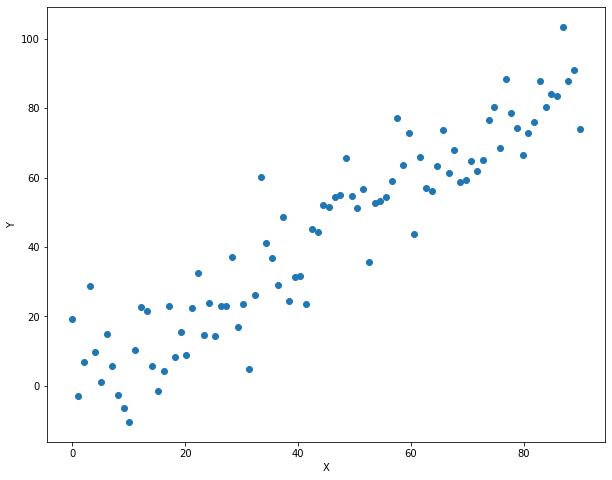

In [12]:
# 设定绘制窗口大小为10*8
plt.figure(figsize=(10, 8))
# 绘制数据，考虑到x和y都是Variable，需要用data获取它们包裹的Tensor，并转成numpy
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.xlabel('X')  # 添加X轴的标注
plt.ylabel('Y')  # 添加Y周的标注
plt.show()  # 将图形画在下面

## 2.构造模型，计算损失函数

In [13]:
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
print(predictions) # 打印数据

tensor([ 0.8122,  1.0428,  1.2734,  1.5039,  1.7345,  1.9651,  2.1957,  2.4263,
         2.6569,  2.8874,  3.1180,  3.3486,  3.5792,  3.8098,  4.0404,  4.2709,
         4.5015,  4.7321,  4.9627,  5.1933,  5.4239,  5.6544,  5.8850,  6.1156,
         6.3462,  6.5768,  6.8074,  7.0380,  7.2685,  7.4991,  7.7297,  7.9603,
         8.1909,  8.4215,  8.6520,  8.8826,  9.1132,  9.3438,  9.5744,  9.8050,
        10.0355, 10.2661, 10.4967, 10.7273, 10.9579, 11.1885, 11.4190, 11.6496,
        11.8802, 12.1108, 12.3414, 12.5720, 12.8025, 13.0331, 13.2637, 13.4943,
        13.7249, 13.9555, 14.1860, 14.4166, 14.6472, 14.8778, 15.1084, 15.3390,
        15.5695, 15.8001, 16.0307, 16.2613, 16.4919, 16.7225, 16.9530, 17.1836,
        17.4142, 17.6448, 17.8754, 18.1060, 18.3365, 18.5671, 18.7977, 19.0283,
        19.2589, 19.4895, 19.7201, 19.9506, 20.1812, 20.4118, 20.6424, 20.8730,
        21.1035, 21.3341], grad_fn=<AddBackward0>)


In [14]:
# 计算损失函数
loss = torch.mean((predictions - y_train) ** 2)
# 开始反向传播梯度
loss.backward()
# 开始梯度下降，其中0.001为学习率
a.data.add_(- 0.001 * a.grad.data)
b.data.add_(- 0.001 * b.grad.data)

tensor([0.8777])

无法改变一个Variable，而只能对Variable的data属性做更改
所有函数加“_”意味着该方法需要更新调用者的数值。

## 3.训练模型训练模型

In [15]:
a = torch.rand(1, requires_grad=True)  # 创建a变量，并随机赋值初始化
b = torch.rand(1, requires_grad=True)  # 创建b变量，并随机赋值初始化
print('Initial parameters:', [a, b])

Initial parameters: [tensor([0.8765], requires_grad=True), tensor([0.9828], requires_grad=True)]


In [16]:
learning_rate = 0.0001  # 设置学习率
# 开始迭代
for i in range(1000):
    # 计算在当前a、b条件下的模型预测数值
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
    # 通过与标签数据y比较，计算误差
    loss = torch.mean((predictions - y_train) ** 2)
    print('loss:', loss)
    # 对损失函数进行梯度反传
    loss.backward()
    # 利用上一步计算中得到的a的梯度信息更新a中的data数值
    a.data.add_(- learning_rate * a.grad.data)
    # 利用上一步计算中得到的b的梯度信息更新b中的data数值
    b.data.add_(- learning_rate * b.grad.data)
    # 清空存储在变量a，b中的梯度信息，以免在backward的过程中会反复不停地累加
    a.grad.data.zero_()  # 清空a的梯度数值
    b.grad.data.zero_()  # 清空b的梯度数值

loss: tensor(122.2326, grad_fn=<MeanBackward0>)
loss: tensor(106.6659, grad_fn=<MeanBackward0>)
loss: tensor(103.4000, grad_fn=<MeanBackward0>)
loss: tensor(102.7148, grad_fn=<MeanBackward0>)
loss: tensor(102.5710, grad_fn=<MeanBackward0>)
loss: tensor(102.5408, grad_fn=<MeanBackward0>)
loss: tensor(102.5344, grad_fn=<MeanBackward0>)
loss: tensor(102.5330, grad_fn=<MeanBackward0>)
loss: tensor(102.5326, grad_fn=<MeanBackward0>)
loss: tensor(102.5326, grad_fn=<MeanBackward0>)
loss: tensor(102.5324, grad_fn=<MeanBackward0>)
loss: tensor(102.5324, grad_fn=<MeanBackward0>)
loss: tensor(102.5323, grad_fn=<MeanBackward0>)
loss: tensor(102.5322, grad_fn=<MeanBackward0>)
loss: tensor(102.5322, grad_fn=<MeanBackward0>)
loss: tensor(102.5321, grad_fn=<MeanBackward0>)
loss: tensor(102.5320, grad_fn=<MeanBackward0>)
loss: tensor(102.5320, grad_fn=<MeanBackward0>)
loss: tensor(102.5319, grad_fn=<MeanBackward0>)
loss: tensor(102.5319, grad_fn=<MeanBackward0>)
loss: tensor(102.5318, grad_fn=<MeanBack

loss: tensor(102.5175, grad_fn=<MeanBackward0>)
loss: tensor(102.5175, grad_fn=<MeanBackward0>)
loss: tensor(102.5174, grad_fn=<MeanBackward0>)
loss: tensor(102.5174, grad_fn=<MeanBackward0>)
loss: tensor(102.5173, grad_fn=<MeanBackward0>)
loss: tensor(102.5172, grad_fn=<MeanBackward0>)
loss: tensor(102.5172, grad_fn=<MeanBackward0>)
loss: tensor(102.5171, grad_fn=<MeanBackward0>)
loss: tensor(102.5170, grad_fn=<MeanBackward0>)
loss: tensor(102.5170, grad_fn=<MeanBackward0>)
loss: tensor(102.5169, grad_fn=<MeanBackward0>)
loss: tensor(102.5168, grad_fn=<MeanBackward0>)
loss: tensor(102.5168, grad_fn=<MeanBackward0>)
loss: tensor(102.5167, grad_fn=<MeanBackward0>)
loss: tensor(102.5166, grad_fn=<MeanBackward0>)
loss: tensor(102.5166, grad_fn=<MeanBackward0>)
loss: tensor(102.5165, grad_fn=<MeanBackward0>)
loss: tensor(102.5164, grad_fn=<MeanBackward0>)
loss: tensor(102.5164, grad_fn=<MeanBackward0>)
loss: tensor(102.5163, grad_fn=<MeanBackward0>)
loss: tensor(102.5162, grad_fn=<MeanBack

loss: tensor(102.5023, grad_fn=<MeanBackward0>)
loss: tensor(102.5023, grad_fn=<MeanBackward0>)
loss: tensor(102.5022, grad_fn=<MeanBackward0>)
loss: tensor(102.5021, grad_fn=<MeanBackward0>)
loss: tensor(102.5021, grad_fn=<MeanBackward0>)
loss: tensor(102.5020, grad_fn=<MeanBackward0>)
loss: tensor(102.5020, grad_fn=<MeanBackward0>)
loss: tensor(102.5019, grad_fn=<MeanBackward0>)
loss: tensor(102.5018, grad_fn=<MeanBackward0>)
loss: tensor(102.5017, grad_fn=<MeanBackward0>)
loss: tensor(102.5017, grad_fn=<MeanBackward0>)
loss: tensor(102.5016, grad_fn=<MeanBackward0>)
loss: tensor(102.5015, grad_fn=<MeanBackward0>)
loss: tensor(102.5015, grad_fn=<MeanBackward0>)
loss: tensor(102.5014, grad_fn=<MeanBackward0>)
loss: tensor(102.5013, grad_fn=<MeanBackward0>)
loss: tensor(102.5013, grad_fn=<MeanBackward0>)
loss: tensor(102.5012, grad_fn=<MeanBackward0>)
loss: tensor(102.5012, grad_fn=<MeanBackward0>)
loss: tensor(102.5011, grad_fn=<MeanBackward0>)
loss: tensor(102.5011, grad_fn=<MeanBack

loss: tensor(102.4871, grad_fn=<MeanBackward0>)
loss: tensor(102.4870, grad_fn=<MeanBackward0>)
loss: tensor(102.4870, grad_fn=<MeanBackward0>)
loss: tensor(102.4869, grad_fn=<MeanBackward0>)
loss: tensor(102.4869, grad_fn=<MeanBackward0>)
loss: tensor(102.4868, grad_fn=<MeanBackward0>)
loss: tensor(102.4867, grad_fn=<MeanBackward0>)
loss: tensor(102.4867, grad_fn=<MeanBackward0>)
loss: tensor(102.4866, grad_fn=<MeanBackward0>)
loss: tensor(102.4866, grad_fn=<MeanBackward0>)
loss: tensor(102.4865, grad_fn=<MeanBackward0>)
loss: tensor(102.4865, grad_fn=<MeanBackward0>)
loss: tensor(102.4864, grad_fn=<MeanBackward0>)
loss: tensor(102.4863, grad_fn=<MeanBackward0>)
loss: tensor(102.4863, grad_fn=<MeanBackward0>)
loss: tensor(102.4862, grad_fn=<MeanBackward0>)
loss: tensor(102.4861, grad_fn=<MeanBackward0>)
loss: tensor(102.4861, grad_fn=<MeanBackward0>)
loss: tensor(102.4860, grad_fn=<MeanBackward0>)
loss: tensor(102.4859, grad_fn=<MeanBackward0>)
loss: tensor(102.4859, grad_fn=<MeanBack

loss: tensor(102.4721, grad_fn=<MeanBackward0>)
loss: tensor(102.4720, grad_fn=<MeanBackward0>)
loss: tensor(102.4720, grad_fn=<MeanBackward0>)
loss: tensor(102.4719, grad_fn=<MeanBackward0>)
loss: tensor(102.4719, grad_fn=<MeanBackward0>)
loss: tensor(102.4718, grad_fn=<MeanBackward0>)
loss: tensor(102.4718, grad_fn=<MeanBackward0>)
loss: tensor(102.4717, grad_fn=<MeanBackward0>)
loss: tensor(102.4717, grad_fn=<MeanBackward0>)
loss: tensor(102.4716, grad_fn=<MeanBackward0>)
loss: tensor(102.4715, grad_fn=<MeanBackward0>)
loss: tensor(102.4715, grad_fn=<MeanBackward0>)
loss: tensor(102.4714, grad_fn=<MeanBackward0>)
loss: tensor(102.4713, grad_fn=<MeanBackward0>)
loss: tensor(102.4713, grad_fn=<MeanBackward0>)
loss: tensor(102.4712, grad_fn=<MeanBackward0>)
loss: tensor(102.4712, grad_fn=<MeanBackward0>)
loss: tensor(102.4711, grad_fn=<MeanBackward0>)
loss: tensor(102.4711, grad_fn=<MeanBackward0>)
loss: tensor(102.4710, grad_fn=<MeanBackward0>)
loss: tensor(102.4710, grad_fn=<MeanBack

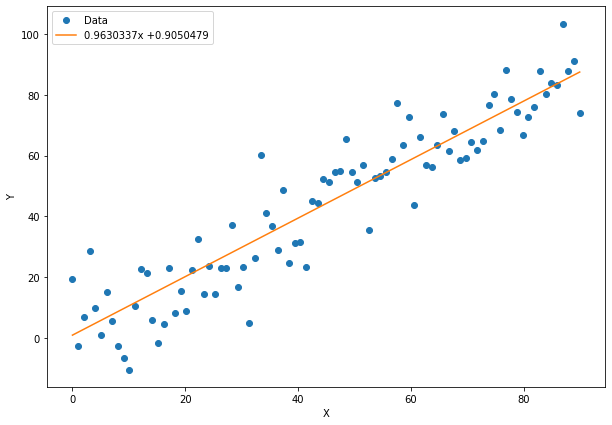

In [17]:
x_data = x_train.data.numpy()  # 获得x包裹的数据
plt.figure(figsize=(10, 7))  # 设定绘图窗口大小
xplot, = plt.plot(x_data, y_train.numpy(), 'o')  # 绘制原始数据
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  # 绘制拟合数据
plt.xlabel('X')  # 更改坐标轴标注
plt.ylabel('Y')  # 更改坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])  # 图例信息
plt.legend([xplot, yplot], ['Data', str1])  # 绘制图例
plt.show()


## 4.测试评估

In [18]:
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test)  # 计算模型的预测结果
print(predictions)  # 输出

tensor([88.4536, 89.4263, 90.3991, 91.3718, 92.3446, 93.3174, 94.2901, 95.2629,
        96.2356, 97.2084], grad_fn=<AddBackward0>)


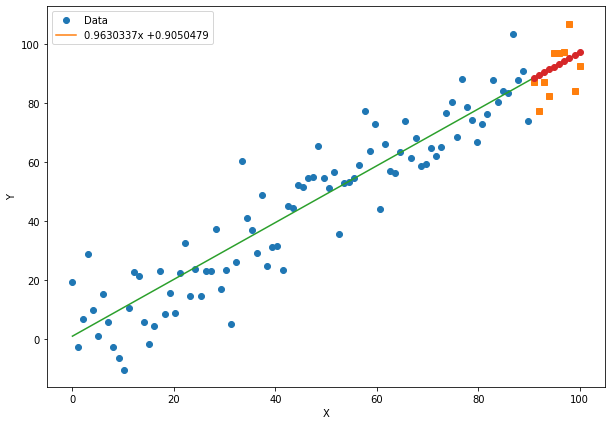

In [19]:
x_data = x_train.data.numpy()  # 获得x包裹的数据
x_pred = x_test.data.numpy()
plt.figure(figsize=(10, 7))  # 设定绘图窗口大小
plt.plot(x_data, y_train.data.numpy(), 'o')  # 绘制训练数据
plt.plot(x_pred, y_test.data.numpy(), 's')  # 绘制测试数据
x_data = np.r_[x_data, x_test.data.numpy()]
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  # 绘制拟合数据
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o')  # 绘制预测数据
plt.xlabel('X')  # 更改坐标轴标注
plt.ylabel('Y')  # 更改坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])  # 图例信息
plt.legend([xplot, yplot], ['Data', str1])  # 绘制图例
plt.show()